In [ ]:
from utils.download_data import DatasetDownloader

#donwload the dataset from the published csv file we have in the open art gallery gihthub repo
downloader = DatasetDownloader(limit=500) 
downloader.download_images()


Downloading:   6%|██████▍                                                                                                         | 29/500 [00:31<08:10,  1.04s/it]

Skipped: https://api.nga.gov/iiif/00100d82-34d0-49e9-9740-1f26ba94cac8/full/full/0/default.jpg | Error: Failed to decode image.


Downloading:   9%|██████████▎                                                                                                     | 46/500 [00:50<06:30,  1.16it/s]

Skipped: https://api.nga.gov/iiif/0019ec63-fc64-4e6a-9746-6232534331ce/full/full/0/default.jpg | Error: Failed to decode image.


Downloading:  19%|█████████████████████                                                                                           | 94/500 [01:37<05:57,  1.14it/s]

Skipped: https://api.nga.gov/iiif/002d90a7-8a4b-45e2-acf8-48852ee37092/full/full/0/default.jpg | Error: Failed to decode image.


Downloading:  48%|█████████████████████████████████████████████████████▎                                                         | 240/500 [04:18<04:44,  1.10s/it]

Skipped: https://api.nga.gov/iiif/0083a0af-799b-4e12-b5af-fc256a6b134a/full/full/0/default.jpg | Error: Failed to decode image.


Downloading:  61%|███████████████████████████████████████████████████████████████████▉                                           | 306/500 [05:29<02:48,  1.15it/s]

Skipped: https://api.nga.gov/iiif/00a40237-1c7b-45e3-b2f1-995118ea4a3c/full/full/0/default.jpg | Error: Failed to decode image.


Downloading:  77%|█████████████████████████████████████████████████████████████████████████████████████▋                         | 386/500 [07:00<01:44,  1.09it/s]

Skipped: https://api.nga.gov/iiif/00d5e25b-28bb-4f76-8cf3-c9afbd9a7950/full/full/0/default.jpg | Error: Failed to decode image.


Downloading:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 487/500 [08:47<00:11,  1.15it/s]

Skipped: https://api.nga.gov/iiif/010b8e6e-4dac-41f3-9b25-16894fc4168c/full/full/0/default.jpg | Error: Failed to decode image.


Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [09:00<00:00,  1.08s/it]

Download complete!
Check 'data\failed_downloads.txt' for any failed downloads.


In [8]:
import os 
print(os.listdir())
data_dir = os.path.join(os.getcwd(), "data")
print(data_dir)

['.ipynb_checkpoints', 'data', 'download_data.py', 'extract_features.py', 'tutorial.ipynb', '__pycache__']
C:\Users\athar\OneDrive\Desktop\Atharva\Github\open_source\humandArt\task2\data


In [ ]:
from utils.extract_features import FeatureExtractor
#we will extract and save teh features , we will save in dir to avoid computing and loading the features each time
extractor = FeatureExtractor(data_dir)
extractor.process_images()

Using cache found in C:\Users\athar/.cache\torch\hub\facebookresearch_dino_main


Processing 493 images...


Extracting Features: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 493/493 [12:37<00:00,  1.54s/it]

Feature extraction completed.


In [63]:
feature_dir = os.path.join(os.getcwd(),"features")
print(feature_dir)

C:\Users\athar\OneDrive\Desktop\Atharva\Github\open_source\humandArt\task2\features


In [14]:
import requests

def download_image(url, filename, save_dir="."):
    """
    Downloads an image from the given URL and saves it with the specified filename.
    
    Parameters:
    - url (str): The URL of the image to download.
    - filename (str): The name to save the image as (including extension, e.g., "image.jpg").
    - save_dir (str): The directory where the image will be saved (default is current directory).
    """
    response = requests.get(url, stream=True)
    
    if response.status_code == 200:
        os.makedirs(save_dir, exist_ok=True)
        file_path = os.path.join(save_dir, filename)
        
        with open(file_path, "wb") as file:
            file.write(response.content)
        
        print(f"Image downloaded successfully: {file_path}")
    else:
        print(f"Failed to download image. Status code: {response.status_code}")

# Example usage
image_url = "https://img1.bonhams.com/image?src=Images/live/2015-05/11/9165634-35-12.jpg"
download_image(image_url, "web_image.jpg", save_dir=".")


Image downloaded successfully: .\web_image.jpg


In [17]:
query_image = os.path.join(os.getcwd(),'web_image.jpg')
print(query_image)

C:\Users\athar\OneDrive\Desktop\Atharva\Github\open_source\humandArt\task2\web_image.jpg


In [ ]:
from utils.image_retrival import ImageRetrieval

retrieval = ImageRetrieval(feature_dir=feature_dir, model_name="dino", use_face=False)

# Perform similarity search
results = retrieval.find_similar_images(query_image, k=3)

# Print results
print("Similar Images:", results)


Using cache found in C:\Users\athar/.cache\torch\hub\facebookresearch_dino_main


Finding 3 similar images for C:\Users\athar\OneDrive\Desktop\Atharva\Github\open_source\humandArt\task2\web_image.jpg (Face Mode: False)...
Similar Images: {'dino': ['image_298.jpg', 'image_130.jpg', 'image_307.jpg']}


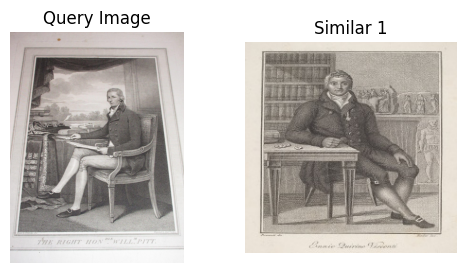

In [39]:
import matplotlib.pyplot as plt
from PIL import Image


def display_images(query_image_path, image_names, image_dir):
    """
    Displays the query image followed by retrieved similar images.
    
    Parameters:
        query_image_path (str): Path to the query image.
        image_names (list): List of image file names to display.
        image_dir (str): Directory containing the retrieved images.
    """
    num_images = len(image_names) + 1  
    fig, axes = plt.subplots(1, num_images, figsize=(3 * num_images, 3))
    
    # Display query image
    query_image = Image.open(query_image_path)
    axes[0].imshow(query_image)
    axes[0].set_title("Query Image")
    axes[0].axis("off")
    
    # Display retrieved images
    for i, image_name in enumerate(image_names):
        image_path = os.path.join(image_dir, image_name)
        retrieved_image = Image.open(image_path)
        axes[i + 1].imshow(retrieved_image)
        axes[i + 1].set_title(f"Similar {i + 1}")
        axes[i + 1].axis("off")
    # plt.savefig("result1.png", bbox_inches="tight")
    plt.show()
display_images(query_image, [results['dino'][0]], data_dir)

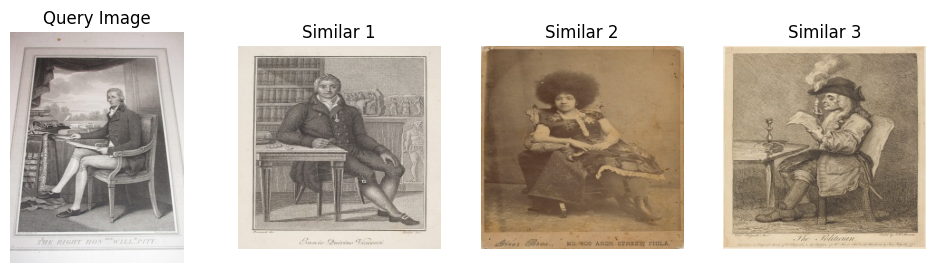

In [40]:
display_images(query_image, results['dino'], data_dir)

In [72]:
new_query_image = os.path.join(os.getcwd(),"image.png")
retrieval = ImageRetrieval(feature_dir=feature_dir, model_name="dino", use_face=False)

# Perform similarity search
results1 = retrieval.find_similar_images(new_query_image, k=3)

# Print results
print("Similar Images:", results)


Using cache found in C:\Users\athar/.cache\torch\hub\facebookresearch_dino_main


Finding 3 similar images for C:\Users\athar\OneDrive\Desktop\Atharva\Github\open_source\humandArt\task2\image.png (Face Mode: False)...
Similar Images: {'dino': ['image_298.jpg', 'image_130.jpg', 'image_307.jpg']}


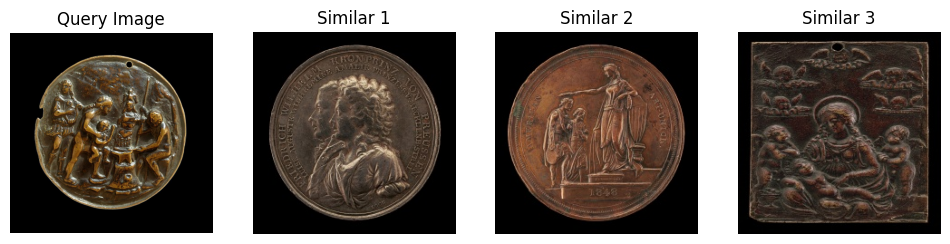

In [74]:
display_images(new_query_image, results1['dino'], data_dir)

In [44]:
#lets visualize our dataset how it looks 

features = "features"
without_face = "without_face"
model_name = "dino"

features_path = os.path.join(os.getcwd(), features, without_face, model_name)
print(features_path)


C:\Users\athar\OneDrive\Desktop\Atharva\Github\open_source\humandArt\task2\features\without_face\dino


C:\Users\athar\anaconda3\envs\artextract\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\athar\anaconda3\envs\artextract\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\athar\anaconda3\envs\artextract\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\athar\anaconda3\envs\artextract\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\athar\anaconda3\envs\artextract\Lib\subpr

t-SNE visualization saved as: tsne_visualization.png


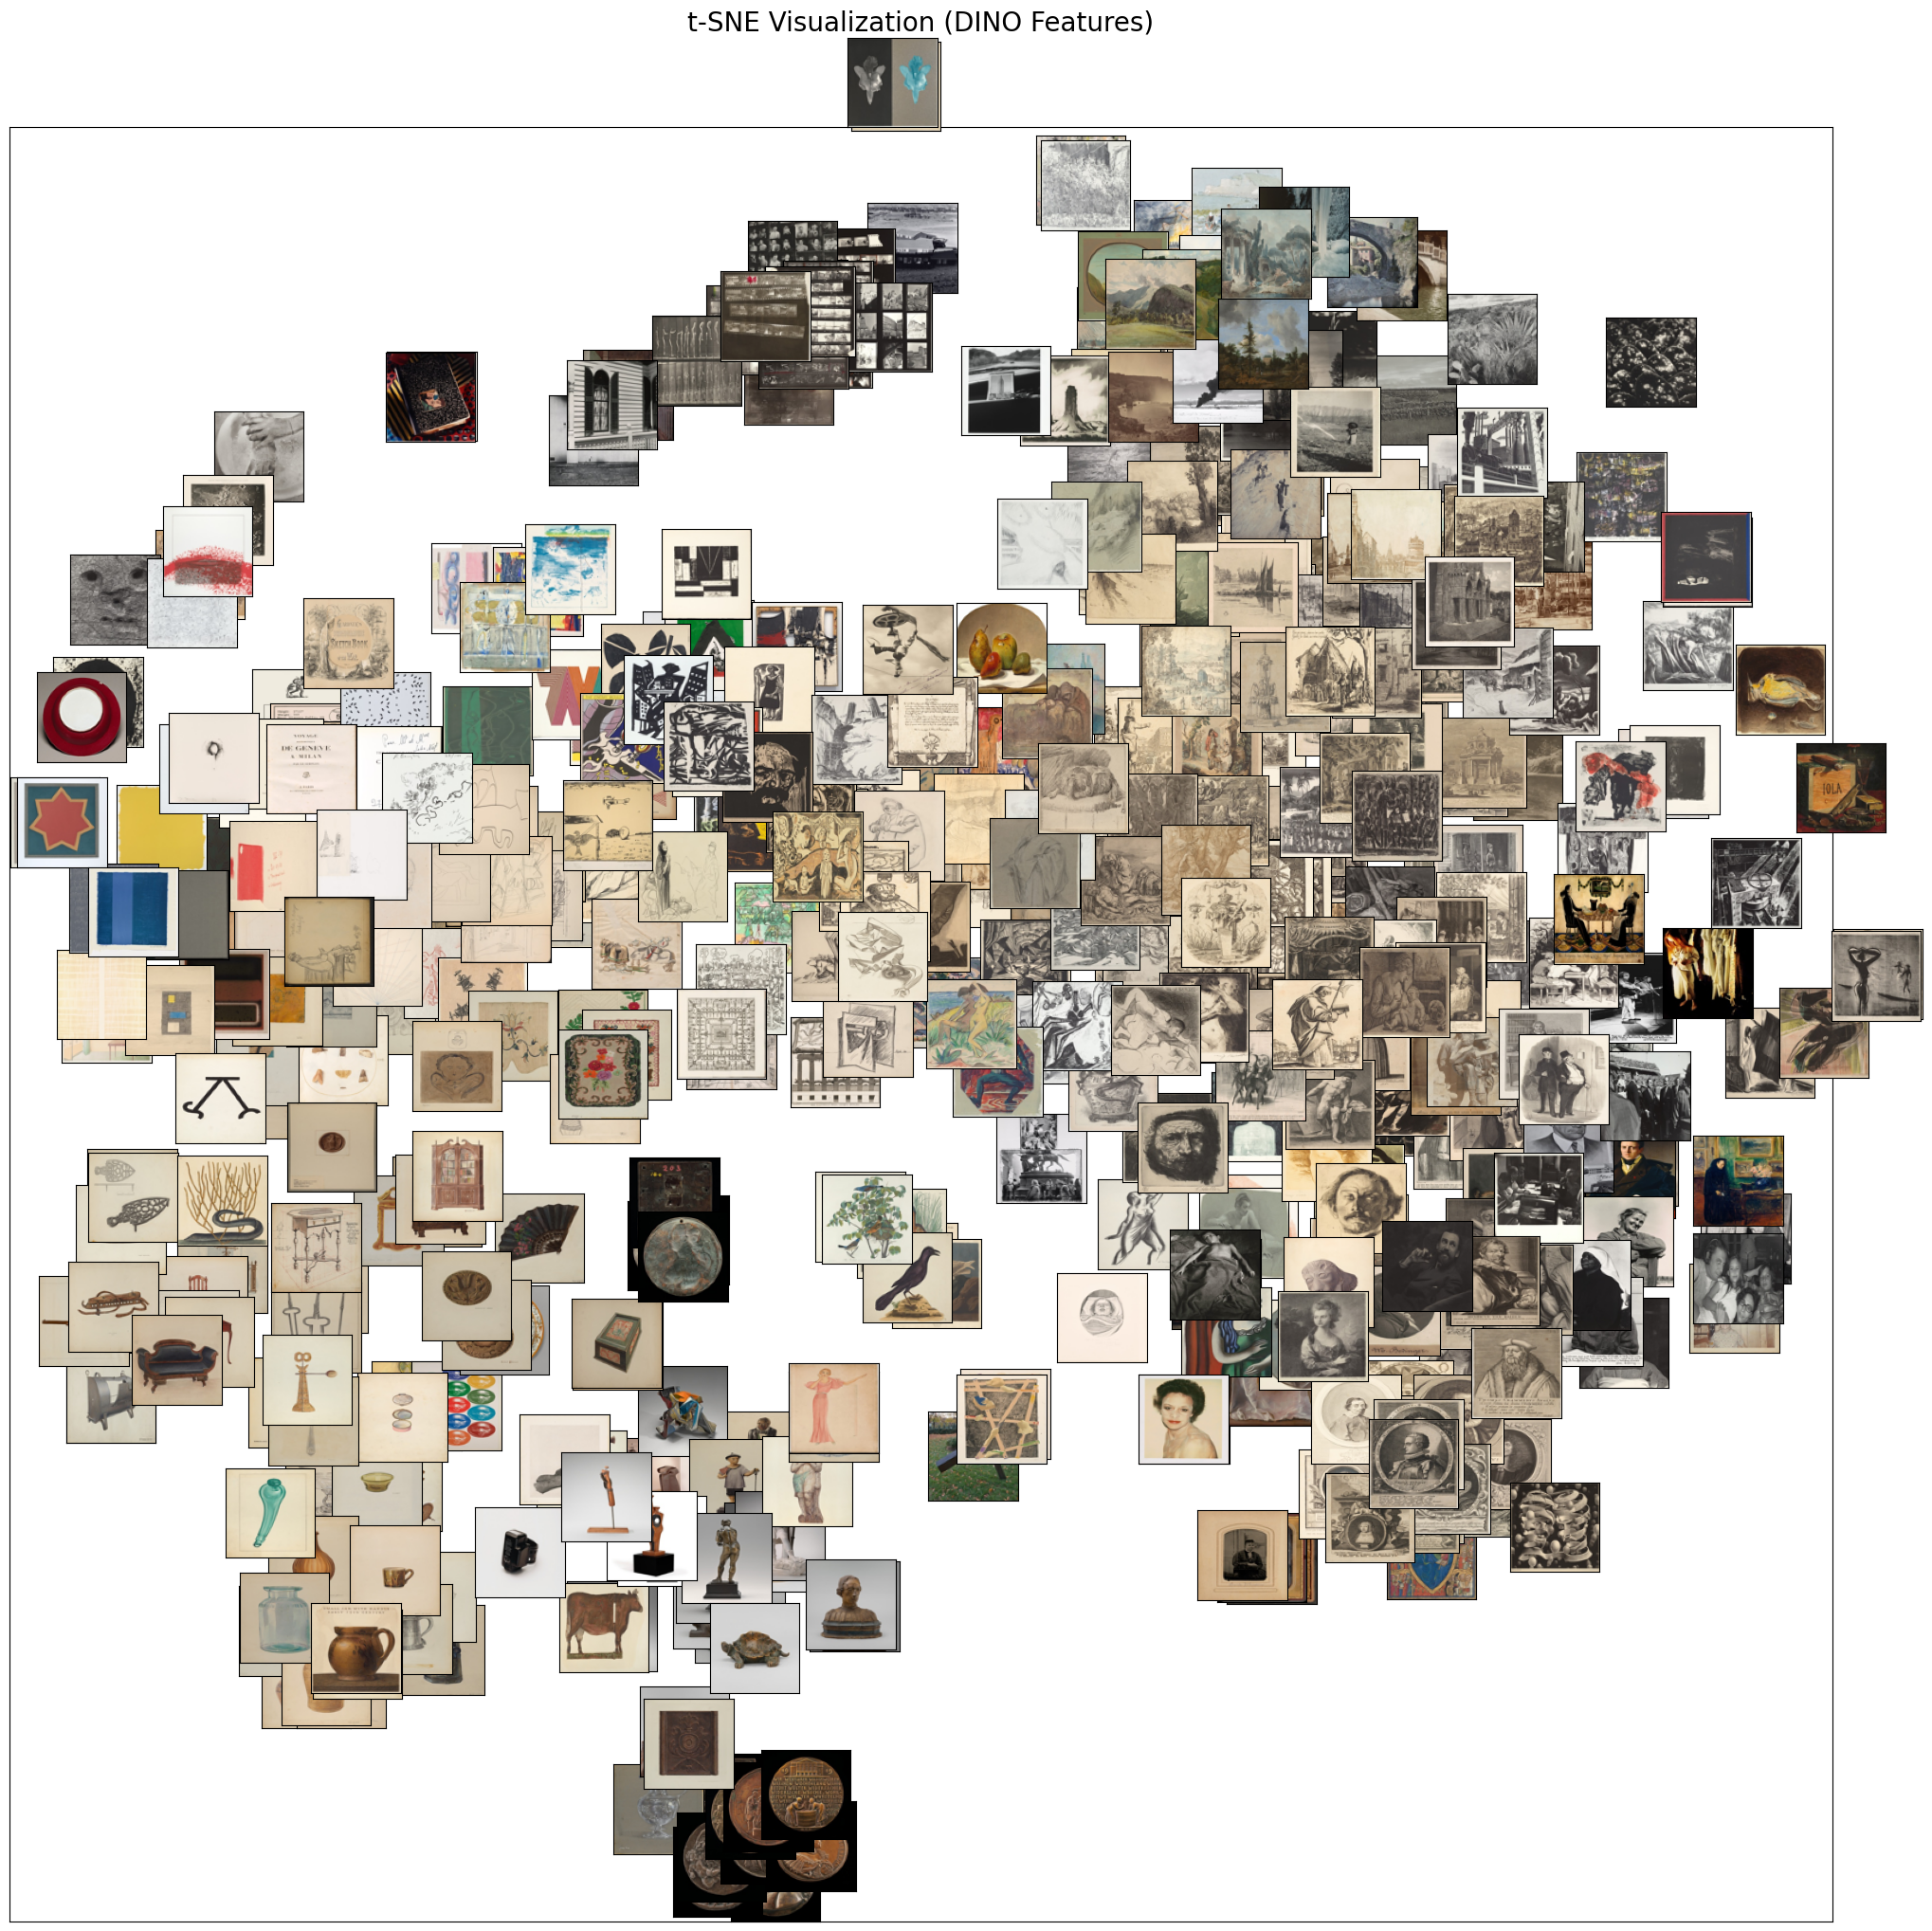

In [ ]:
from utils.visualize import TSNEVisualizer

tsne_vis = TSNEVisualizer(features_path, data_dir, model_name="dino")
tsne_vis.apply_tsne()
tsne_vis.plot_tsne()

In [48]:
print (os.listdir())

['.ipynb_checkpoints', 'data', 'download_data.py', 'eval_data', 'extract_features.py', 'features', 'image_retrival.py', 'result.png', 'result1.png', 'tsne_visualization.png', 'tutorial.ipynb', 'visualize.py', 'web_image.jpg', '__pycache__']


In [51]:
eval_dir = os.path.join(os.getcwd(),"eval_data")
print (eval_dir)

C:\Users\athar\OneDrive\Desktop\Atharva\Github\open_source\humandArt\task2\eval_data


In [69]:
import os
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

retrieval_convnext = ImageRetrieval(feature_dir=feature_dir, model_name="convnext", use_face=False)
retrieval_dino = ImageRetrieval(feature_dir=feature_dir, model_name="dino", use_face=False)

def compute_ssim(img1_path, img2_path):
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
    
    if img1 is None or img2 is None:
        print(f"Error loading images: {img1_path}, {img2_path}")
        return None
    
    img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))
    score, _ = ssim(img1, img2, full=True)
    return score

ssim_results = {"convnext": {}, "dino": {}}

for image_name in os.listdir(eval_dir):
    eval_image_path = os.path.join(eval_dir, image_name)
    
    for model_name, retrieval in [("convnext", retrieval_convnext), ("dino", retrieval_dino)]:
        try:
            similar_images = retrieval.find_similar_images(eval_image_path, k=1)
            
            if not similar_images:
                print(f"No similar image found for {image_name} using {model_name}")
                continue
            
            retrieved_image_name = next(iter(similar_images.values()))[0]
            retrieved_image_path = os.path.join(data_dir, retrieved_image_name)
            
            if not os.path.exists(retrieved_image_path):
                print(f"Retrieved image not found: {retrieved_image_path}")
                continue
            
            ssim_score = compute_ssim(eval_image_path, retrieved_image_path)
            
            if ssim_score is not None:
                ssim_results[model_name][image_name] = ssim_score
                print(f"SSIM for {image_name} and {retrieved_image_name} using {model_name}: {ssim_score:.4f}")
            else:
                print(f"Failed to compute SSIM for {image_name} using {model_name}")
        
        except FileNotFoundError as e:
            print(f"FileNotFoundError: {e}")
        except Exception as e:
            print(f"Error processing {image_name} using {model_name}: {e}")

# Compute the average SSIM per model
avg_ssim_convnext = np.mean(list(ssim_results["convnext"].values())) if ssim_results["convnext"] else None
avg_ssim_dino = np.mean(list(ssim_results["dino"].values())) if ssim_results["dino"] else None

print(f"\nAverage SSIM - ConvNeXt: {avg_ssim_convnext:.4f}")
print(f"Average SSIM - DINO: {avg_ssim_dino:.4f}")


Using cache found in C:\Users\athar/.cache\torch\hub\facebookresearch_dino_main


Finding 1 similar images for C:\Users\athar\OneDrive\Desktop\Atharva\Github\open_source\humandArt\task2\eval_data\image_0.jpg (Face Mode: False)...
SSIM for image_0.jpg and image_0.jpg using convnext: 0.0480
Finding 1 similar images for C:\Users\athar\OneDrive\Desktop\Atharva\Github\open_source\humandArt\task2\eval_data\image_0.jpg (Face Mode: False)...
SSIM for image_0.jpg and image_0.jpg using dino: 0.0480
Finding 1 similar images for C:\Users\athar\OneDrive\Desktop\Atharva\Github\open_source\humandArt\task2\eval_data\image_1.jpg (Face Mode: False)...
SSIM for image_1.jpg and image_1.jpg using convnext: 0.1967
Finding 1 similar images for C:\Users\athar\OneDrive\Desktop\Atharva\Github\open_source\humandArt\task2\eval_data\image_1.jpg (Face Mode: False)...
SSIM for image_1.jpg and image_1.jpg using dino: 0.1967
Finding 1 similar images for C:\Users\athar\OneDrive\Desktop\Atharva\Github\open_source\humandArt\task2\eval_data\image_10.jpg (Face Mode: False)...
SSIM for image_10.jpg and i